# Classification Models

 This notebook demonstrates various classifiers, metrics, and other features of the package Scikit-learn, XGBoost, Statsmodels

#### Import statements

In [27]:
# General imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualization imports
import seaborn as sns

# Scikit learn misc. imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score  # using version .18
from sklearn.metrics import roc_curve, roc_auc_score

# Scikit learn model imports
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# XGBoost
#import xgboost as xgb

# Stats models
import statsmodels.api as sm

# Tensor Flow
import tensorflow as tf
from tensorflow.keras import layers


%matplotlib inline

## Get data first
I'll demonstrate the various classifier functions with different types of data including simple binary classification data, multiclass classification, and multilabel classification.

### Binary classification

In [2]:
# This data is known as the UCI ML Breast Cancer Wisconsin Diagnostic datset
(data,target) = datasets.load_breast_cancer(return_X_y=True)

#### EDA of data

In [48]:
# first convert to pandas data frame
data = pd.DataFrame(data)
target = pd.Series(target)

# calculate summary statistics of the columns
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [49]:
# Get what types the data are and check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
0     569 non-null float64
1     569 non-null float64
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
dtypes: float64(30)
memory usage: 133.4 KB


In [50]:
target.value_counts()

1    357
0    212
dtype: int64

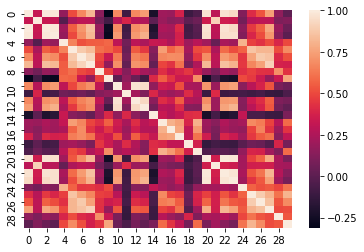

In [28]:
# Get correlation between features
corr = data.corr()
sns.heatmap(corr)

#### Split into train, val

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)

#### Multiclass classification

In [77]:
# Take only the last two classes to make it a binary classification problem
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[50:,:])
Y = pd.DataFrame(iris.target[50:]) - 1

#### Multilabel classification

#### Split into training and test set

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

### Metric Functions

In [38]:
def metrics(model, X_train, y_train, y_test, model_scores):
    # k-fold validation
    scores = cross_val_score(model, X_train, y_train.values.flatten(), cv=10)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    # AUC
#     auc = roc_auc_score(y_test.values.flatten(), model_scores) # model scores should be the probability of the positive class
#     print(auc)
    
#     # Plot ROC curve
#     fpr, tpr, thresholds = roc_curve(y_test.values.flatten(), model_scores, pos_label=1)

#     plt.figure()
#     lw = 2
#     plt.plot(fpr, tpr, color='darkorange',label='ROC curve (AUC = %0.2f)' % auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC')
#     plt.legend( loc="lower right")
#     plt.show()
    
    
    

# Classification

### Logistic Regression

#### Stats models version

In [25]:
clf = sm.Logit(y_train, X_train)

  # fit the model
result = clf.fit()

PerfectSeparationError: Perfect separation detected, results not available

In [30]:
print result.summary()

NameError: name 'result' is not defined

In [217]:
result.predict(X_test)

0    1.331004e-21
dtype: float64

#### Scikit learn version

In [79]:
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf = clf.fit(X_train, y_train.values.flatten())

In [66]:
clf.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [83]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.10)


### Neural Net

In [49]:
model = tf.keras.Sequential()
model.add(layers.Dense(60, activation='relu'))
# Add another:
model.add(layers.Dense(60, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
341/341 [==============================] - 1s 2ms/step - loss: 8.0258 - acc: 0.5000
Epoch 2/50
341/341 [==============================] - 0s 58us/step - loss: 8.0258 - acc: 0.5000
Epoch 3/50
341/341 [==============================] - 0s 75us/step - loss: 8.0258 - acc: 0.5000
Epoch 4/50
341/341 [==============================] - 0s 61us/step - loss: 8.0258 - acc: 0.5000
Epoch 5/50
341/341 [==============================] - 0s 67us/step - loss: 8.0258 - acc: 0.5000
Epoch 6/50
341/341 [==============================] - 0s 69us/step - loss: 8.0258 - acc: 0.5000
Epoch 7/50
341/341 [==============================] - 0s 62us/step - loss: 8.0258 - acc: 0.5000
Epoch 8/50
341/341 [==============================] - 0s 69us/step - loss: 8.0258 - acc: 0.5000
Epoch 9/50
341/341 [==============================] - 0s 57us/step - loss: 8.0258 - acc: 0.5000
Epoch 10/50
341/341 [==============================] - 0s 61us/step - loss: 8.0258 - acc: 0.5000
Epoch 11/50
341/341 [===================

In [50]:
sum((model.predict(X_test).argmax(axis=1) - y_test)==0)

145

In [36]:
y_test.shape

(228,)

### Decision Tree

In [40]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [41]:
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0])

In [42]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

AttributeError: 'numpy.ndarray' object has no attribute 'values'

## Ensembles

### Random Forrest

In [45]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train.values.flatten())

In [46]:
# the class labels
clf.classes_

array([0, 1])

In [47]:
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.10)
0.9258312020460358


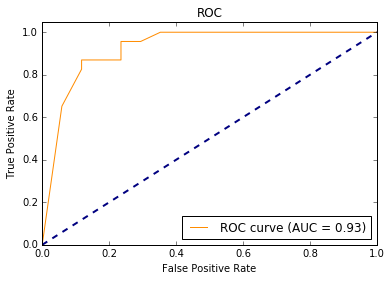

In [48]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

### AdaBoost

In [49]:
clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train,y_train.values.flatten())

In [50]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         0.8       ]
Accuracy: 0.96 (+/- 0.15)
0.8823529411764706


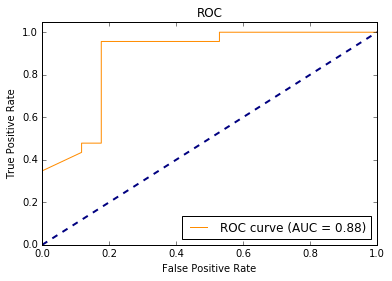

In [51]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

### Gradient Boosting

In [52]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf = clf.fit(X_train,y_train.values.flatten())

In [53]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         0.8       ]
Accuracy: 0.96 (+/- 0.15)
0.8452685421994885


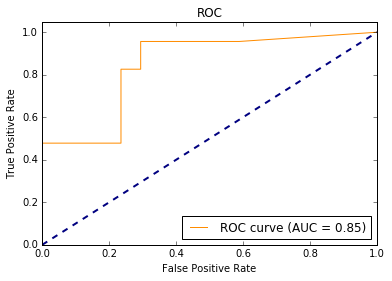

In [54]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

### XGBoost

In [60]:
clf = xgb.XGBClassifier()
clf = clf.fit(X_train,y_train.values.flatten())

In [61]:
clf.predict(X_test)

/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.10)
0.8976982097186701


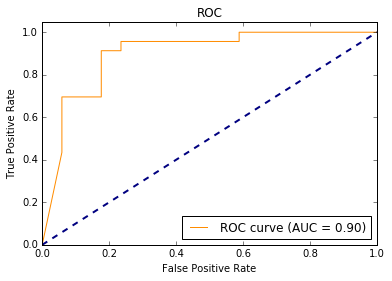

In [62]:
metrics(clf, X_train, y_train, y_test, clf.predict_proba(X_test)[:,1])

### Voting

In [74]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
eclf = eclf.fit(X_train,y_train.values.flatten())

In [75]:
eclf.predict(X_test)

/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

[1.         1.         1.         1.         1.         1.
 0.83333333 1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.10)
0.9411764705882353


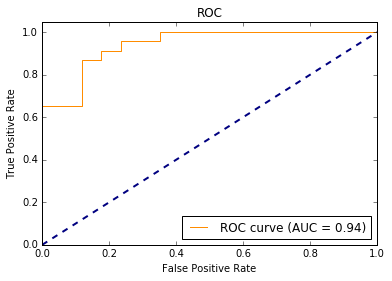

In [76]:
metrics(eclf, X_train, y_train, y_test, eclf.predict_proba(X_test)[:,1])

NameError: name 'cm' is not defined

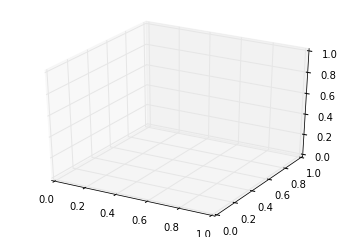

In [85]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()


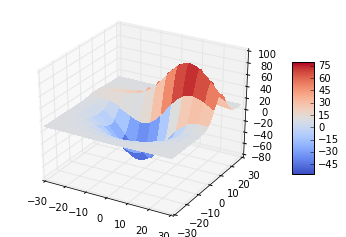

In [90]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y, Z = axes3d.get_test_data(0.05)
Z = Z+10

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


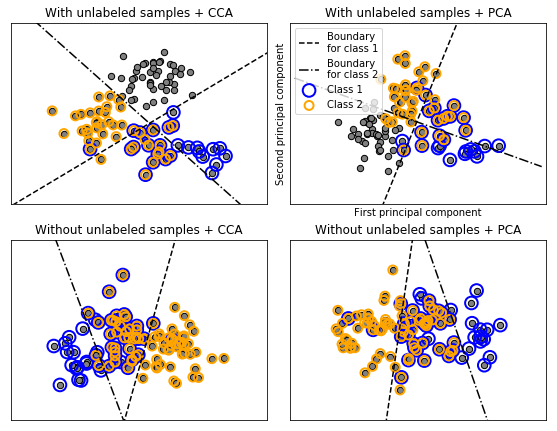

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

In [3]:
Y

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1,